<h1 align="center"> Лабораторная работа №2</h1>
<h1 align="center"> Создание модели </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

<h2 align="center"> 65/35 </h2>

---

### Выполнили:
- **Бархоткина Анастасия 408226**
- **Лаврик Вадим 408969**
- **Юрков Кирилл 409936**

---

### Преподаватель:
- **Хитров Егор Германович**

---

### 2025 г.

---

## **Введение:**
### Цель работы: 
Изучить особенности метода сопряженных градиентов (Хестениса-Штифеля, Флетчера-Ривса) и его модификаций для решения задач минимизации квадратичного функционала; применить метод для обучения линейной модели на имеющихся данных.

### Задачи:
- Подготовить данные для обучения модели
- Реализовать методы Хестениса-Штифеля, Флетчера-Ривса
- Посторить графики убывания функции, нормы градиента, а также нормы вектора весов линейной модели α
- Проанализировать сходимость и особенности алгоритмов



## **Ход работы:**
В данной лабораторной работе мы будем находить минимум функционала потерь для линейной модели, обученной на выборке данных из датасета housing.csv. В качестве целевой переменной используется столбец MEDV (медианная стоимость жилья), а матрица признаков формируется из остальных столбцов датасета. Задача решается с использованием метода Хестениса-Штифеля (и его модификации - метода Флетчера-Ривса) для минимизации функционала:
$$
\rho^2 = \| X \alpha - y \|_2^2 \to \min_{\alpha},
$$
где X - матрица признаков, α - вектор весов линейной модели, y - вектор целевых значений.


### Подготовка данных
Целевая переменная y задается как столбец MEDV. Матрицу признаков X будем формировать из всех столбцов, кроме целевого. Далее разделим данные на обучающую и тестовую выборки с заданной долей (65/35) и параметром random_state = 23.


Затем нормализуем обучающую выборку следующим образом: признаки центрируются и масштабируются, а целевая переменная стандартизируется.


сюда вероятно нужен кусок кода ********

### Инициализация параметров
Начальный вектор весов α инициализируется нулями. Далее будем вычислять начальный градиент функционала и определять начальное направление спуска как: 
$d = -\text{grad}$.



сюда вероятно нужен кусок кода ********

### Задание 1. Метод Хестенса-Штифеля

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

### **ЗАДАНИЕ 1.** Алгоритм Хестениса-Шифеля

Загрузим данные:

In [ ]:
df = pd.read_csv("housing.csv")
X = df.drop(columns=["MEDV"]).values
y = df["MEDV"].values.reshape(-1, 1)

Поделим данные для обучения/теста в соотношении 65/35, как было задано по вариантам.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=23)

Проведём масштабирование:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

(Настя описывай алгоритм по умному)

In [ ]:
def hestenes_stiefel_cg(X, y, max_iter=100, tol=0.001):
    start_time = time.time() 
    
    alpha = np.zeros((X.shape[1], 1))
    r = X.T @ (X @ alpha - y)
    p = -r
    loss_values = []
    grad_norms = []
    alpha_norms = []
    iteration_count = 0  

    for k in range(max_iter):
        iteration_count += 1  
        
        Ap = X.T @ (X @ p)
        alpha_step = (r.T @ r) / (p.T @ Ap)
        alpha = alpha + alpha_step * p

        r_new = r + alpha_step * Ap
        beta = (r_new.T @ (r_new - r)) / (p.T @ (r_new - r))

        p = -r_new + beta * p
        r = r_new

        loss = 0.5 * np.linalg.norm(X @ alpha - y)**2
        grad_norm = np.linalg.norm(r)
        alpha_norm = np.linalg.norm(alpha)

        loss_values.append(loss)
        grad_norms.append(grad_norm)
        alpha_norms.append(alpha_norm)

        if grad_norm < tol:
            break

    elapsed_time = time.time() - start_time  # Вычисление затраченного времени
    return alpha, loss_values, grad_norms, alpha_norms, elapsed_time, iteration_count


Теперь выведем результат алгоритма, а также графики:

In [ ]:
def run_and_visualize(method, X_train, y_train, title_prefix=""):
    alpha_opt, losses, grad_norms, alpha_norms, execution_time, iterations = method(X_train, y_train)
    
    print(f"{title_prefix} Время выполнения алгоритма: {execution_time:.4f} секунд")
    print(f"{title_prefix} Количество итераций: {iterations}")
    
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plt.plot(losses, label=f"{title_prefix} Loss", color="blue")
    plt.title(f"{title_prefix} Функция потерь $\\rho^2$")
    plt.xlabel("Итерация")
    plt.ylabel("Значение")
    plt.yscale("log")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(grad_norms, label=f"{title_prefix} Gradient Norm", color="orange")
    plt.title(f"{title_prefix} Норма градиента")
    plt.xlabel("Итерация")
    plt.ylabel("$\\|\\nabla \\rho^2\\|$")
    plt.yscale("log")
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(alpha_norms, label=f"{title_prefix} Alpha Norm", color="green")
    plt.title(f"{title_prefix} Норма весов $\\|\\alpha\\|$")
    plt.xlabel("Итерация")
    plt.ylabel("Норма")
    plt.legend()

    plt.tight_layout()
    plt.show()

HS:  Время выполнения алгоритма: 0.0010 секунд
HS:  Количество итераций: 14


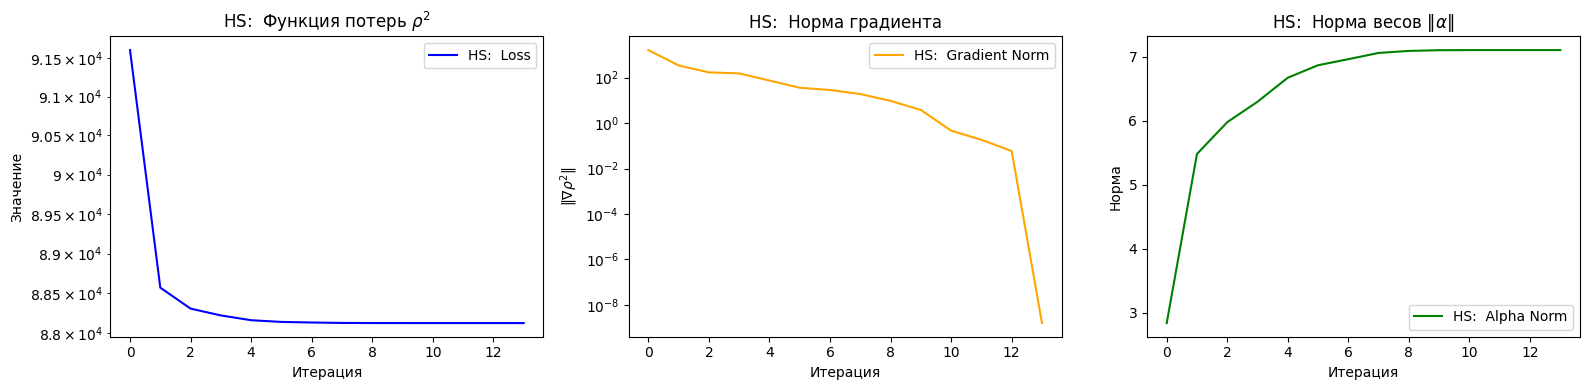

In [ ]:
run_and_visualize(hestenes_stiefel_cg, X_train_scaled, y_train, title_prefix="HS: ")

### **ЗАДАНИЕ 2.** Алгоритм Флетчера-Ривса

Загрузим данные, только теперь y не преобразовываем:

In [ ]:
data = pd.read_csv('housing.csv')
X = data.drop(columns=['MEDV']).values  # Матрица признаков
y = data['MEDV'].values  

Делаем деление выборки на train/test в соотнешении 65/35:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.65, random_state=23)

Нормализируем данные:

In [ ]:
X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
y_train_scaled = (y_train - y_train.mean()) / y_train.std()

(Тут тоже умное напиши, как умеешь)

In [ ]:
def fletcher_reeves(X_train, y_train, tol=1e-6, max_iter=2000):
    alpha = np.zeros(X_train.shape[1])  # Начальные веса
    grad = 2 * X_train.T @ (X_train @ alpha - y_train)  # Градиент
    d = -grad  # Начальное направление
    
    losses = []
    grad_norms = []
    alpha_norms = []
    
    start_time = time.time()
    num_iterations = 0  # Счетчик итераций

    for k in range(max_iter):
        # Сохранение текущих значений
        losses.append(np.linalg.norm(X_train @ alpha - y_train) ** 2)
        grad_norms.append(np.linalg.norm(grad))
        alpha_norms.append(np.linalg.norm(alpha))
        
        # Проверка условия остановки
        if np.linalg.norm(grad) < tol:
            break
        
        # Вычисление оптимального шага beta
        Ad = 2 * X_train.T @ (X_train @ d)
        beta = -(grad.T @ d) / (d.T @ Ad)
        
        # Обновление весов
        alpha = alpha + beta * d
        
        # Вычисление нового градиента
        grad_new = 2 * X_train.T @ (X_train @ alpha - y_train)
        
        # Вычисление коэффициента gamma
        gamma = np.linalg.norm(grad_new) ** 2 / np.linalg.norm(grad) ** 2
        
        # Обновление направления
        d = -grad_new + gamma * d
        
        # Обновление градиента
        grad = grad_new
        num_iterations+=1
        
    execution_time = time.time() - start_time
    return alpha, losses, grad_norms, alpha_norms,execution_time, num_iterations 

Выведем результаты работы алгоритма:

FR:  Время выполнения алгоритма: 0.0010 секунд
FR:  Количество итераций: 14


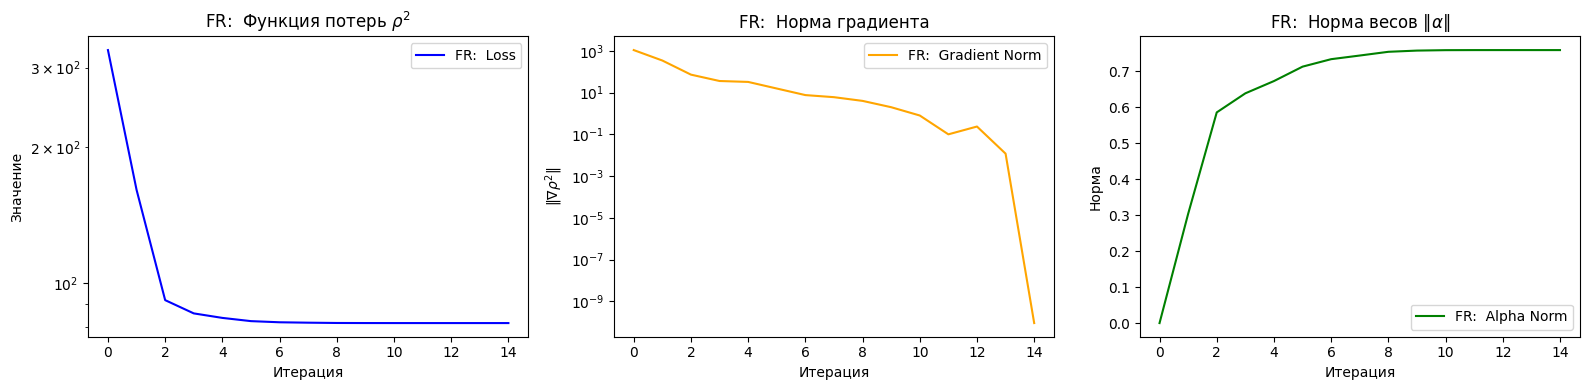

In [ ]:
run_and_visualize(fletcher_reeves, X_train_scaled, y_train_scaled, title_prefix="FR: ")